In [14]:
%pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier as xgb

from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, recall_score, precision_score,f1_score,classification_report

import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

Inporting & Checking Data

In [33]:

test_data_path = "/Users/trgk_almohsinsquaretradecs.com/Desktop/DS/Churn Project/test.csv"
train_data_path = "/Users/trgk_almohsinsquaretradecs.com/Desktop/DS/Churn Project/train.csv"

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

In [103]:
train_data.head()

,Customer_ID,Age,Gender,Location,Subscription_Type,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Last_Interaction_Type,Complaint_Tickets,Promo_Opted_In,Churn
0,1001,19,Male,Illinois,Basic,50,152.44,416,5,2,61,76,3,Neutral,0,1,1
1,1002,41,Male,California,Premium,14,113.34,36,5,1,17,90,5,Negative,3,0,0
2,1003,44,Female,Florida,Basic,2,168.39,207,3,1,85,12,6,Neutral,3,0,1
3,1004,21,Male,Florida,Basic,55,197.12,379,4,3,54,32,4,Positive,3,1,0
4,1005,65,Male,New York,Premium,12,84.46,475,5,4,82,62,1,Neutral,0,0,1


In [104]:
print(len(train_data))

8000


In [105]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            8000 non-null   int64  
 1   Age                    8000 non-null   int64  
 2   Gender                 8000 non-null   object 
 3   Location               8000 non-null   object 
 4   Subscription_Type      8000 non-null   object 
 5   Account_Age_Months     8000 non-null   int64  
 6   Monthly_Spending       8000 non-null   float64
 7   Total_Usage_Hours      8000 non-null   int64  
 8   Support_Calls          8000 non-null   int64  
 9   Late_Payments          8000 non-null   int64  
 10  Streaming_Usage        8000 non-null   int64  
 11  Discount_Used          8000 non-null   int64  
 12  Satisfaction_Score     8000 non-null   int64  
 13  Last_Interaction_Type  8000 non-null   object 
 14  Complaint_Tickets      8000 non-null   int64  
 15  Prom

In [106]:
print(len(train_data))
print(len(train_data.drop_duplicates()))

8000
8000


Exploratory Data Analysis (EDA)

In [107]:
train_data.head()

,Customer_ID,Age,Gender,Location,Subscription_Type,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Last_Interaction_Type,Complaint_Tickets,Promo_Opted_In,Churn
0,1001,19,Male,Illinois,Basic,50,152.44,416,5,2,61,76,3,Neutral,0,1,1
1,1002,41,Male,California,Premium,14,113.34,36,5,1,17,90,5,Negative,3,0,0
2,1003,44,Female,Florida,Basic,2,168.39,207,3,1,85,12,6,Neutral,3,0,1
3,1004,21,Male,Florida,Basic,55,197.12,379,4,3,54,32,4,Positive,3,1,0
4,1005,65,Male,New York,Premium,12,84.46,475,5,4,82,62,1,Neutral,0,0,1


In [108]:
train_data.describe()

,Customer_ID,Age,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Complaint_Tickets,Promo_Opted_In,Churn
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,5000.50000,43.542250,30.163875,104.804641,254.326625,4.45325,1.99250,49.798000,49.428250,5.462375,1.970500,0.499750,0.313125
std,2309.54541,14.909242,16.942407,54.643255,140.855632,2.88892,1.39971,28.965468,28.662071,2.879865,1.413375,0.500031,0.463794
min,1001.00000,18.000000,1.000000,10.090000,10.000000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3000.75000,31.000000,15.000000,57.637500,133.000000,2.00000,1.00000,24.000000,25.000000,3.000000,1.000000,0.000000,0.000000
50%,5000.50000,44.000000,30.000000,104.690000,256.500000,4.00000,2.00000,51.000000,50.000000,5.000000,2.000000,0.000000,0.000000
75%,7000.25000,57.000000,45.000000,151.697500,376.000000,7.00000,3.00000,75.000000,74.000000,8.000000,3.000000,1.000000,1.000000
max,9000.00000,69.000000,59.000000,199.940000,499.000000,9.00000,4.00000,99.000000,99.000000,10.000000,4.000000,1.000000,1.000000


In [52]:
train_data['Churn'].value_counts()

Churn
0    5495
1    2505
Name: count, dtype: int64

In [53]:
train_data['Gender'].value_counts()

Gender
Female    4035
Male      3965
Name: count, dtype: int64

In [54]:
train_data['Subscription_Type'].value_counts()

Subscription_Type
Basic         4063
Premium       3120
Enterprise     817
Name: count, dtype: int64

In [55]:
train_data['Customer_ID'].nunique()

8000

In [56]:
len(train_data)

8000

In [57]:
print(train_data['Monthly_Spending'].min())
print(train_data['Monthly_Spending'].max())

10.09
199.94


In [58]:
print(train_data['Account_Age_Months'].min())
print(train_data['Account_Age_Months'].max())

1
59


,Customer_ID,Age,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Complaint_Tickets,Promo_Opted_In,Churn
Customer_ID,1.000000,-0.004487,-0.007497,0.000960,-0.006116,-0.007391,-0.000287,0.010378,0.000020,-0.005005,-0.008759,0.000394,-0.000212
Age,-0.004487,1.000000,0.003642,0.006774,0.000794,0.008005,-0.000913,-0.003860,0.003985,-0.020838,-0.019703,-0.007763,-0.016458
Account_Age_Months,-0.007497,0.003642,1.000000,0.004322,0.012517,-0.018071,0.011254,0.006403,0.003155,0.018604,-0.001464,0.000794,0.003301
Monthly_Spending,0.000960,0.006774,0.004322,1.000000,-0.011568,-0.002452,-0.009883,-0.032069,0.011635,0.010395,-0.014809,-0.009957,0.009202
Total_Usage_Hours,-0.006116,0.000794,0.012517,-0.011568,1.000000,-0.016895,0.004017,0.017184,0.006351,0.019352,-0.001601,-0.031488,-0.003860
Support_Calls,-0.007391,0.008005,-0.018071,-0.002452,-0.016895,1.000000,0.012218,-0.010109,0.004000,-0.009190,-0.017392,-0.004941,-0.012913
Late_Payments,-0.000287,-0.000913,0.011254,-0.009883,0.004017,0.012218,1.000000,0.005609,-0.005663,-0.002706,0.022385,-0.000360,-0.016602
Streaming_Usage,0.010378,-0.003860,0.006403,-0.032069,0.017184,-0.010109,0.005609,1.000000,-0.000183,0.006217,-0.005041,-0.008575,-0.008729
Discount_Used,0.000020,0.003985,0.003155,0.011635,0.006351,0.004000,-0.005663,-0.000183,1.000000,0.031059,0.007879,0.008757,0.020400
Satisfaction_Score,-0.005005,-0.020838,0.018604,0.010395,0.019352,-0.009190,-0.002706,0.006217,0.031059,1.000000,-0.010869,0.007937,0.019819


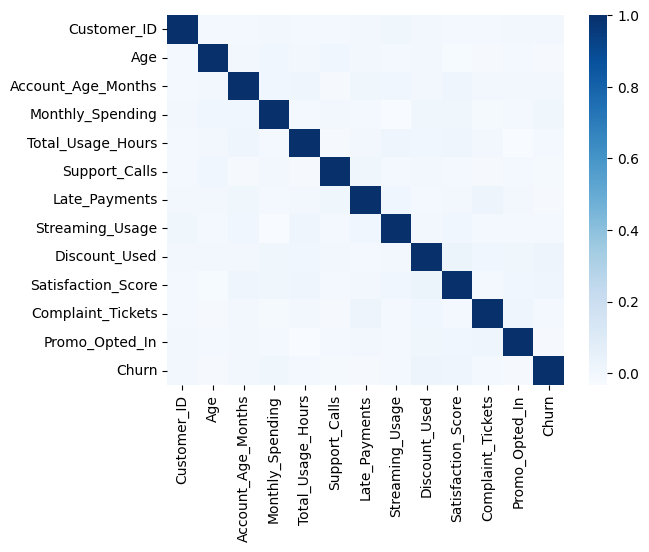

In [59]:
corr = train_data.select_dtypes('number').corr()

sns.heatmap(corr, cmap="Blues")

corr

/var/folders/jq/_4h7b5f91134z56cn02nfg9r0000gn/T/ipykernel_25703/1867237379.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Churn'])


<Axes: xlabel='Churn', ylabel='Density'>

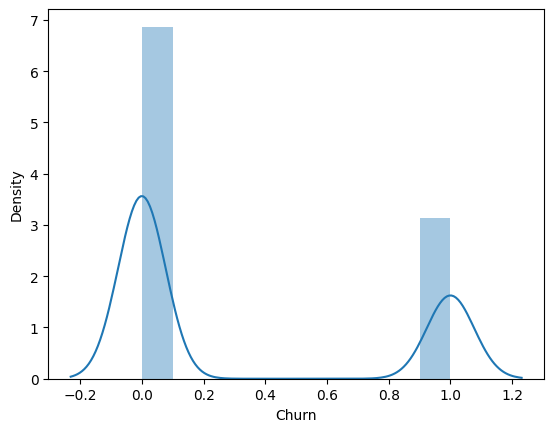

In [60]:
sns.distplot(train_data['Churn'])

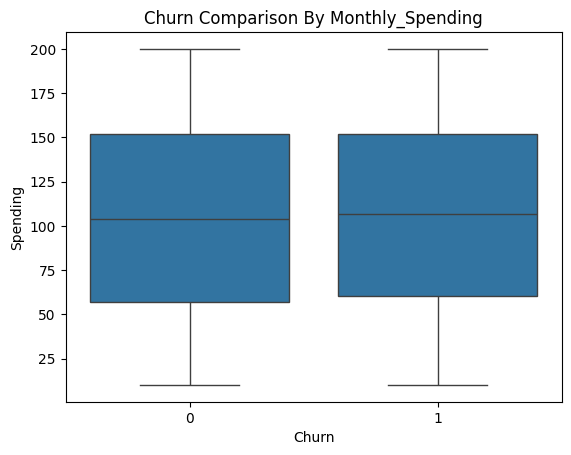

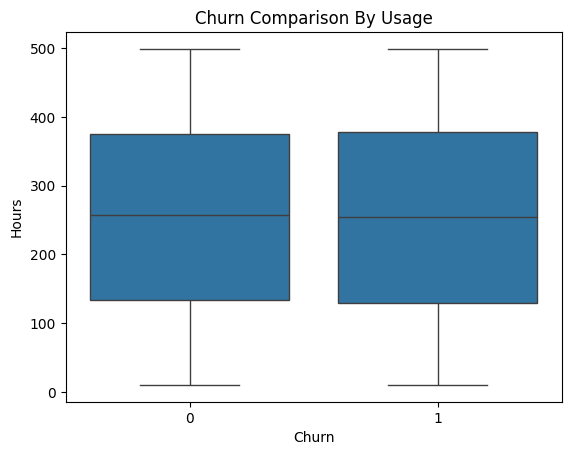

In [67]:
sns.boxplot(x='Churn', y='Monthly_Spending', data=train_data)

plt.xlabel('Churn')
plt.ylabel('Spending')
plt.title('Churn Comparison By Monthly_Spending')

plt.show()

sns.boxplot(x='Churn', y='Total_Usage_Hours', data=train_data)

plt.xlabel('Churn')
plt.ylabel('Hours')
plt.title('Churn Comparison By Usage')


plt.show()

Data Processing & Preparation


In [34]:
train_data_dummified = pd.get_dummies(train_data,dtype=float)

train_data_dummified.drop(columns={'Customer_ID'},inplace=True)

train_data_dummified.head()

,Age,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Complaint_Tickets,...,Location_Florida,Location_Illinois,Location_New York,Location_Texas,Subscription_Type_Basic,Subscription_Type_Enterprise,Subscription_Type_Premium,Last_Interaction_Type_Negative,Last_Interaction_Type_Neutral,Last_Interaction_Type_Positive
0,19,50,152.44,416,5,2,61,76,3,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,41,14,113.34,36,5,1,17,90,5,3,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,44,2,168.39,207,3,1,85,12,6,3,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,21,55,197.12,379,4,3,54,32,4,3,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,65,12,84.46,475,5,4,82,62,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [35]:
encoder = LabelEncoder()

train_data_le = train_data.copy()

train_data_le['Gender'] = encoder.fit_transform(train_data_le['Gender'])

train_data_le['Location'] = encoder.fit_transform(train_data_le['Location'])

train_data_le['Subscription_Type'] = encoder.fit_transform(train_data_le['Subscription_Type'])

train_data_le['Last_Interaction_Type'] = encoder.fit_transform(train_data_le['Last_Interaction_Type'])

train_data_le.drop(columns={'Customer_ID'},inplace=True)

train_data_le.head()


,Age,Gender,Location,Subscription_Type,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Last_Interaction_Type,Complaint_Tickets,Promo_Opted_In,Churn
0,19,1,2,0,50,152.44,416,5,2,61,76,3,1,0,1,1
1,41,1,0,2,14,113.34,36,5,1,17,90,5,0,3,0,0
2,44,0,1,0,2,168.39,207,3,1,85,12,6,1,3,0,1
3,21,1,1,0,55,197.12,379,4,3,54,32,4,2,3,1,0
4,65,1,3,2,12,84.46,475,5,4,82,62,1,1,0,0,1


,Age,Gender,Location,Subscription_Type,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Last_Interaction_Type,Complaint_Tickets,Promo_Opted_In,Churn
Age,1.000000,0.007378,0.008241,-0.013222,0.003642,0.006774,0.000794,0.008005,-0.000913,-0.003860,0.003985,-0.020838,0.011156,-0.019703,-0.007763,-0.016458
Gender,0.007378,1.000000,-0.016219,-0.005485,-0.010681,-0.004556,-0.017925,0.000248,-0.008264,0.000724,-0.003140,0.011606,-0.005836,0.001763,-0.002254,-0.008917
Location,0.008241,-0.016219,1.000000,-0.019972,0.006171,-0.001628,0.003191,-0.006600,-0.011657,-0.004086,0.003732,0.000577,0.019453,-0.015386,0.000711,-0.004229
Subscription_Type,-0.013222,-0.005485,-0.019972,1.000000,-0.009060,-0.006873,-0.006422,0.008672,0.006927,0.008233,0.011592,0.000970,0.001307,0.003404,-0.012693,-0.004221
Account_Age_Months,0.003642,-0.010681,0.006171,-0.009060,1.000000,0.004322,0.012517,-0.018071,0.011254,0.006403,0.003155,0.018604,0.007850,-0.001464,0.000794,0.003301
Monthly_Spending,0.006774,-0.004556,-0.001628,-0.006873,0.004322,1.000000,-0.011568,-0.002452,-0.009883,-0.032069,0.011635,0.010395,0.002582,-0.014809,-0.009957,0.009202
Total_Usage_Hours,0.000794,-0.017925,0.003191,-0.006422,0.012517,-0.011568,1.000000,-0.016895,0.004017,0.017184,0.006351,0.019352,0.005921,-0.001601,-0.031488,-0.003860
Support_Calls,0.008005,0.000248,-0.006600,0.008672,-0.018071,-0.002452,-0.016895,1.000000,0.012218,-0.010109,0.004000,-0.009190,0.002658,-0.017392,-0.004941,-0.012913
Late_Payments,-0.000913,-0.008264,-0.011657,0.006927,0.011254,-0.009883,0.004017,0.012218,1.000000,0.005609,-0.005663,-0.002706,-0.008449,0.022385,-0.000360,-0.016602
Streaming_Usage,-0.003860,0.000724,-0.004086,0.008233,0.006403,-0.032069,0.017184,-0.010109,0.005609,1.000000,-0.000183,0.006217,0.010286,-0.005041,-0.008575,-0.008729


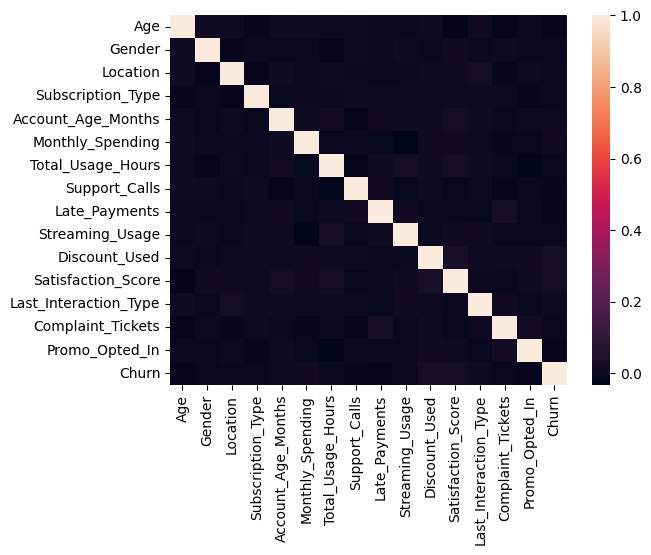

In [110]:
sns.heatmap(train_data_le.corr())
train_data_le.corr()

In [36]:

X = train_data_le.drop(columns={'Churn'})

y = train_data_le[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:


classifier = DecisionTreeClassifier(random_state=1)
classifier.fit(X_train, y_train)

# Prediction
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

0.56125

In [38]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1102
           1       0.30      0.30      0.30       498

    accuracy                           0.56      1600
   macro avg       0.49      0.49      0.49      1600
weighted avg       0.56      0.56      0.56      1600



In [39]:
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.2965931863727455


<Axes: >

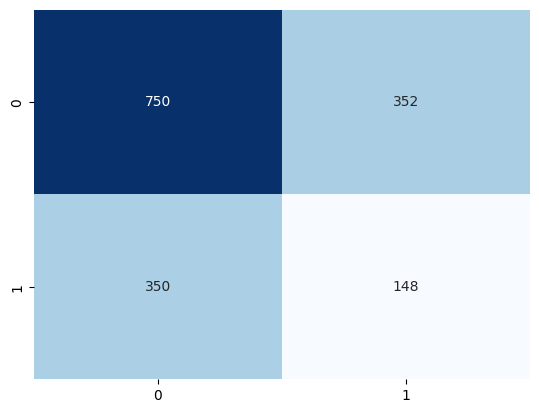

In [115]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [40]:
### Balance and Re-Model DecisionTree

# SMOTE to balance dataset
smote=SMOTE(sampling_strategy='minority') 
X_train_smote, y_train_smote = smote.fit_resample(X, y)

classifier = DecisionTreeClassifier(random_state=1)
classifier.fit(X_train_smote, y_train_smote)

# Prediction

y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.3546099290780142


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [41]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.61      0.65      1102
           1       0.32      0.40      0.35       498

    accuracy                           0.55      1600
   macro avg       0.51      0.51      0.50      1600
weighted avg       0.58      0.55      0.56      1600



<Axes: >

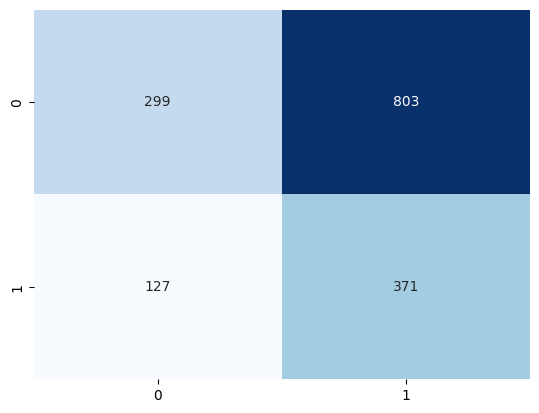

In [121]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [42]:

test_data_le = test_data.copy()

test_data_le['Gender'] = encoder.fit_transform(test_data_le['Gender'])

test_data_le['Location'] = encoder.fit_transform(test_data_le['Location'])

test_data_le['Subscription_Type'] = encoder.fit_transform(test_data_le['Subscription_Type'])

test_data_le['Last_Interaction_Type'] = encoder.fit_transform(test_data_le['Last_Interaction_Type'])

test_data_le.drop(columns={'Customer_ID'},inplace=True)

print(len(test_data))
test_data_le.head()

2000


,Age,Gender,Location,Subscription_Type,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Last_Interaction_Type,Complaint_Tickets,Promo_Opted_In
0,61,0,3,2,26,101.91,37,7,0,73,66,9,0,2,0
1,33,1,2,0,44,33.05,160,9,1,13,8,6,0,4,0
2,22,0,0,2,3,36.67,240,6,4,43,65,2,1,0,0
3,22,1,4,2,45,172.92,172,7,1,75,69,8,0,0,0
4,52,1,2,2,47,30.98,136,8,4,58,7,8,0,3,1


In [44]:
sc = StandardScaler()
test_data_le_standardized = sc.fit_transform(test_data_le)

# Prediction
y_pred = classifier.predict(test_data_le_standardized)
y_pred_proba = classifier.predict_proba(test_data_le_standardized)[:, 1]

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [45]:
final_output_data = test_data[['Customer_ID']]
final_output_data['prob'] = y_pred_proba
# final_output_data['click?'] = y_pred

final_output_data.head()

/var/folders/jq/_4h7b5f91134z56cn02nfg9r0000gn/T/ipykernel_76900/1404143341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_output_data['prob'] = y_pred_proba


,Customer_ID,prob
0,9001,1.0
1,9002,0.0
2,9003,1.0
3,9004,1.0
4,9005,1.0


In [46]:
final_output_data.to_csv('./test-data-with-prob-DT.csv', index=False)

Ramdom Forest Classifier

In [7]:
train_data_le.fillna(0,inplace=True)

X = train_data_le.drop(columns={'Churn'})

y = train_data_le[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = True)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# creating a RF classifier
RFclf = RandomForestClassifier(n_estimators = 100)  
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
RFclf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [8]:

# Prediction
y_pred = RFclf.predict(X_test)

accuracy_score(y_test, y_pred)

print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 0.010471204188481676


In [9]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.99      0.81      1655
           1       0.21      0.01      0.01       745

    accuracy                           0.69      2400
   macro avg       0.45      0.50      0.41      2400
weighted avg       0.54      0.69      0.56      2400



<Axes: >

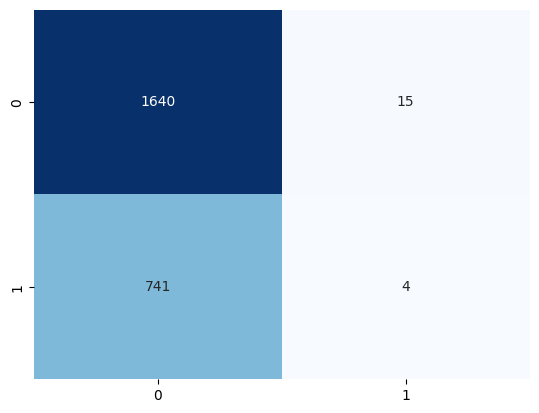

In [10]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [11]:

### Balance and Re-Model RandomForest

# SMOTE to balance dataset
smote = SMOTE(sampling_strategy='minority') 
X_train_smote, y_train_smote = smote.fit_resample(X, y)

# creating a RF classifier
RFclf = RandomForestClassifier(n_estimators = 100)  
 
# Training the model on the training dataset
RFclf.fit(X_train_smote, y_train_smote)

# Prediction
y_pred = RFclf.predict(X_test)

accuracy_score(y_test, y_pred)

print(f"F1 Score : {f1_score(y_test, y_pred)}")


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


F1 Score : 0.07083825265643448


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.96      0.80      1655
           1       0.29      0.04      0.07       745

    accuracy                           0.67      2400
   macro avg       0.49      0.50      0.44      2400
weighted avg       0.57      0.67      0.57      2400



<Axes: >

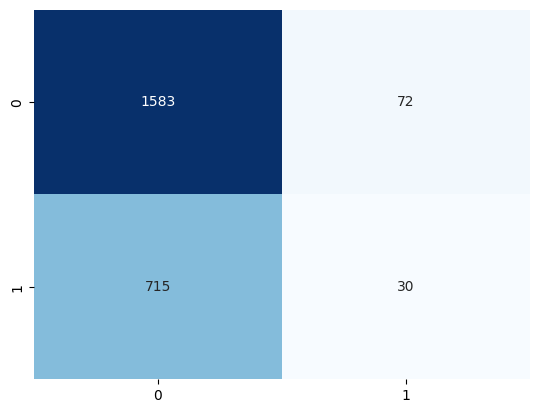

In [13]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [14]:
### Undersample to minority class

undersample = NearMiss(version=3, n_neighbors=3)
# transform the dataset
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)

y_train_undersample['Churn'].value_counts()

Churn
0    1760
1    1760
Name: count, dtype: int64

In [15]:
# creating a RF classifier
RFclf = RandomForestClassifier(n_estimators = 100)  
 
# Training the model on the training dataset
RFclf.fit(X_train_undersample, y_train_undersample)

# Prediction
y_pred = RFclf.predict(X_test)

accuracy_score(y_test, y_pred)

print(f"F1 Score : {f1_score(y_test, y_pred)}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


F1 Score : 0.37083993660855785


In [16]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.52      0.59      1655
           1       0.31      0.47      0.37       745

    accuracy                           0.50      2400
   macro avg       0.50      0.49      0.48      2400
weighted avg       0.57      0.50      0.52      2400



<Axes: >

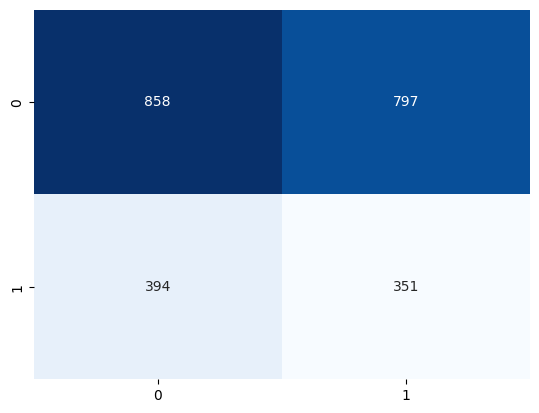

In [17]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [21]:
train_data_dummified.fillna(0,inplace=True)

X = train_data_dummified.drop(columns={'Churn'})

y = train_data_dummified[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = True)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# creating a RF classifier
RFclf = RandomForestClassifier(n_estimators = 100)  
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
RFclf.fit(X_train, y_train)

# Prediction
y_pred = RFclf.predict(X_test)

print(f"F1 Score : {f1_score(y_test, y_pred)}")

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


F1 Score : 0.01564537157757497
Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.99      0.81      1655
           1       0.27      0.01      0.02       745

    accuracy                           0.69      2400
   macro avg       0.48      0.50      0.41      2400
weighted avg       0.56      0.69      0.57      2400



<Axes: >

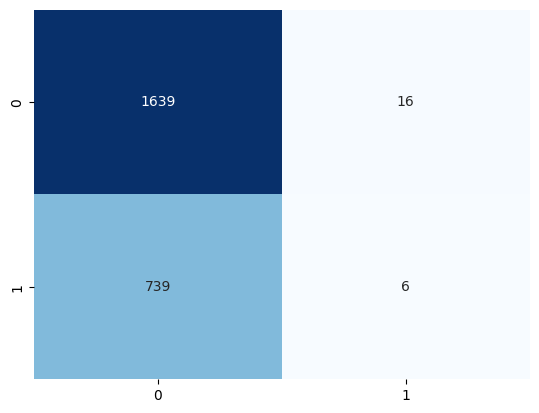

In [22]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [23]:
# SMOTE to balance dataset
smote = SMOTE(sampling_strategy='minority') 
X_train_smote, y_train_smote = smote.fit_resample(X, y)

# creating a RF classifier
RFclf = RandomForestClassifier(n_estimators = 100)  
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
RFclf.fit(X_train_smote, y_train_smote)

# Prediction
y_pred = RFclf.predict(X_test)

print(f"F1 Score : {f1_score(y_test, y_pred)}")

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


F1 Score : 0.43503054989816703
Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.29      0.41      1655
           1       0.31      0.72      0.44       745

    accuracy                           0.42      2400
   macro avg       0.50      0.50      0.42      2400
weighted avg       0.58      0.42      0.42      2400



/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


<Axes: >

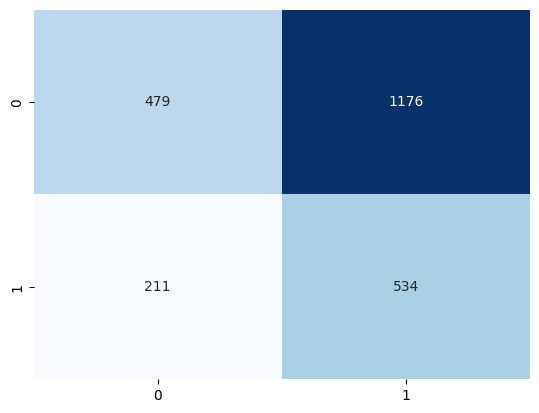

In [24]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

In [26]:
### Undersample to minority class

undersample = NearMiss(version=3, n_neighbors=3)
# transform the dataset
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)

y_train_undersample['Churn'].value_counts()

# creating a RF classifier
RFclf = RandomForestClassifier(n_estimators = 100)  
 
# Training the model on the training dataset
RFclf.fit(X_train_undersample, y_train_undersample)

# Prediction
y_pred = RFclf.predict(X_test)

# accuracy_score(y_test, y_pred)

print(f"F1 Score : {f1_score(y_test, y_pred)}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


F1 Score : 0.3500269251480883


Final Model Selection & Scoring on Test Data

In [27]:
train_data_le.fillna(0,inplace=True)

X = train_data_le.drop(columns={'Churn'})

y = train_data_le[['Churn']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = True)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Undersample to minority class
undersample = NearMiss(version=3, n_neighbors=3)
# transform the dataset
X_train_undersample, y_train_undersample = undersample.fit_resample(X_train, y_train)

y_train_undersample['Churn'].value_counts()

# creating a RF classifier
RFclf = RandomForestClassifier(n_estimators = 100)  
 
# Training the model on the training dataset
RFclf.fit(X_train_undersample, y_train_undersample)

# Prediction
y_pred = RFclf.predict(X_test)

print(f"F1 Score : {f1_score(y_test, y_pred)}")

print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


F1 Score : 0.3650107991360691
Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.54      0.60      1655
           1       0.31      0.45      0.37       745

    accuracy                           0.51      2400
   macro avg       0.50      0.49      0.48      2400
weighted avg       0.57      0.51      0.53      2400



In [28]:

test_data_le = test_data.copy()

test_data_le['Gender'] = encoder.fit_transform(test_data_le['Gender'])

test_data_le['Location'] = encoder.fit_transform(test_data_le['Location'])

test_data_le['Subscription_Type'] = encoder.fit_transform(test_data_le['Subscription_Type'])

test_data_le['Last_Interaction_Type'] = encoder.fit_transform(test_data_le['Last_Interaction_Type'])

test_data_le.drop(columns={'Customer_ID'},inplace=True)

print(len(test_data))
test_data_le.head()

2000


,Age,Gender,Location,Subscription_Type,Account_Age_Months,Monthly_Spending,Total_Usage_Hours,Support_Calls,Late_Payments,Streaming_Usage,Discount_Used,Satisfaction_Score,Last_Interaction_Type,Complaint_Tickets,Promo_Opted_In
0,61,0,3,2,26,101.91,37,7,0,73,66,9,0,2,0
1,33,1,2,0,44,33.05,160,9,1,13,8,6,0,4,0
2,22,0,0,2,3,36.67,240,6,4,43,65,2,1,0,0
3,22,1,4,2,45,172.92,172,7,1,75,69,8,0,0,0
4,52,1,2,2,47,30.98,136,8,4,58,7,8,0,3,1


In [29]:
sc = StandardScaler()
test_data_le_standardized = sc.fit_transform(test_data_le)

# Prediction
y_pred = RFclf.predict(test_data_le_standardized)
y_pred_proba = RFclf.predict_proba(test_data_le_standardized)[:, 1]

In [31]:
final_output_data = test_data[['Customer_ID']]
final_output_data['prob'] = y_pred_proba
# final_output_data['click?'] = y_pred

final_output_data.head()

/var/folders/jq/_4h7b5f91134z56cn02nfg9r0000gn/T/ipykernel_76900/1404143341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_output_data['prob'] = y_pred_proba


,Customer_ID,prob
0,9001,0.45
1,9002,0.30
2,9003,0.44
3,9004,0.53
4,9005,0.50


In [32]:
final_output_data.to_csv('./test_data_with_prob.csv', index=False)